In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [162]:
# import the csv
df_Aliases = pd.read_csv('hillary-clinton-emails/Aliases.csv')
df_EmailReceivers = pd.read_csv('hillary-clinton-emails/EmailReceivers.csv')
df_Emails = pd.read_csv('hillary-clinton-emails/Emails.csv')
df_Persons = pd.read_csv('hillary-clinton-emails/Persons.csv')

In [4]:
df_Emails.head()

,Id,DocNumber,MetadataSubject,MetadataTo,MetadataFrom,SenderPersonId,MetadataDateSent,MetadataDateReleased,MetadataPdfLink,MetadataCaseNumber,...,ExtractedTo,ExtractedFrom,ExtractedCc,ExtractedDateSent,ExtractedCaseNumber,ExtractedDocNumber,ExtractedDateReleased,ExtractedReleaseInPartOrFull,ExtractedBodyText,RawText
0,1,C05739545,WOW,H,"Sullivan, Jacob J",87.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739545...,F-2015-04841,...,NaN,"Sullivan, Jacob J <Sullivan11@state.gov>",NaN,"Wednesday, September 12, 2012 10:16 AM",F-2015-04841,C05739545,05/13/2015,RELEASE IN FULL,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
1,2,C05739546,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,H,NaN,NaN,2011-03-03T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739546...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739546,05/13/2015,RELEASE IN PART,"B6\nThursday, March 3, 2011 9:45 PM\nH: Latest...",UNCLASSIFIED\nU.S. Department of State\nCase N...
2,3,C05739547,CHRIS STEVENS,;H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739547...,F-2015-04841,...,B6,"Mills, Cheryl D <MillsCD@state.gov>","Abedin, Huma","Wednesday, September 12, 2012 11:52 AM",F-2015-04841,C05739547,05/14/2015,RELEASE IN PART,Thx,UNCLASSIFIED\nU.S. Department of State\nCase N...
3,4,C05739550,CAIRO CONDEMNATION - FINAL,H,"Mills, Cheryl D",32.0,2012-09-12T04:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH2/DOC_0C05739550...,F-2015-04841,...,NaN,"Mills, Cheryl D <MillsCD@state.gov>","Mitchell, Andrew B","Wednesday, September 12,2012 12:44 PM",F-2015-04841,C05739550,05/13/2015,RELEASE IN PART,NaN,UNCLASSIFIED\nU.S. Department of State\nCase N...
4,5,C05739554,H: LATEST: HOW SYRIA IS AIDING QADDAFI AND MOR...,"Abedin, Huma",H,80.0,2011-03-11T05:00:00+00:00,2015-05-22T04:00:00+00:00,DOCUMENTS/HRC_Email_1_296/HRCH1/DOC_0C05739554...,F-2015-04841,...,NaN,NaN,NaN,NaN,F-2015-04841,C05739554,05/13/2015,RELEASE IN PART,"H <hrod17@clintonemail.com>\nFriday, March 11,...",B6\nUNCLASSIFIED\nU.S. Department of State\nCa...


## Part 1

In [ ]:
import nltk

In [180]:
nltk.download()
# we make sure those are installed:
# punkt - English tokens
# stopwords - no comment
# wordnet - for lemmatizer

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [22]:
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

Implement a standard text pre-processing pipeline (e.g., tokenization, stopword removal, stemming, etc.) and generate a new word cloud. Discuss briefly the pros and cons (if any) of the two word clouds you generated.

For the word clouds we use this: https://github.com/amueller/word_cloud

In [6]:
mails = df_Emails.RawText

First let's create a word clouds using raw emails

In [11]:
from wordcloud import WordCloud

In [50]:
# We group up all the mails in a single string
text = ""
for mail in mails:
    text += " " + mail

And now we just have to generate the first words cloud with the raw data.

In [51]:
wc = WordCloud().generate(text)

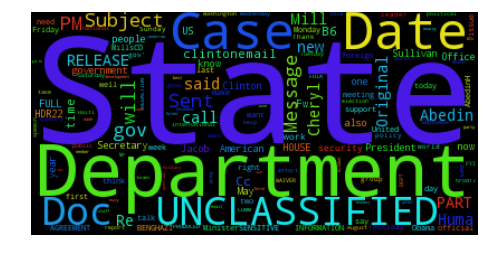

In [54]:
plt.imshow(wc)
plt.axis("off")
plt.show()

### Preprocessing of the mails

Let's now apply some preprocessing to our texts and see how it goes. We will apply:
- Cleaning (like get rid of the '\n'...)
- Tokenization
- Stop-words
- Stems
- (eventually additionnal stuff like thesaurus, ...)


In [56]:
# Replace \n by a simple space
text = text.replace('\n', ' ')

In [61]:
# Let's take care of the stop words

from nltk.corpus import stopwords

stop = set(stopwords.words('english'))

In [63]:
text[0:10000]

" UNCLASSIFIED U.S. Department of State Case No. F-2015-04841 Doc No. C05739545 Date: 05/13/2015 STATE DEPT. - PRODUCED TO HOUSE SELECT BENGHAZI COMM. SUBJECT TO AGREEMENT ON SENSITIVE INFORMATION & REDACTIONS. NO FOIA WAIVER. RELEASE IN FULL From: Sullivan, Jacob J <Sullivan11@state.gov> Sent: Wednesday, September 12, 2012 10:16 AM To: Subject: FW: Wow From: Brose, Christian (Armed Services) (mailto:Christian_Brose@armed-servic,essenate.govi Sent: Wednesday, September 12, 2012 10:09 AM To: Sullivan, Jacob J Subject: Wow What a wonderful, strong and moving statement by your boss. please tell her how much Sen. McCain appreciated it. Me too UNCLASSIFIED U.S. Department of State Case No. F-2015-04841 Doc No. C05739545 Date: 05/13/2015 STATE DEPT. - PRODUCED TO HOUSE SELECT BENGHAZI COMM. SUBJECT TO AGREEMENT ON SENSITIVE INFORMATION & REDACTIONS. NO FOIA WAIVER. STATE-5CB0045247 \x0c UNCLASSIFIED U.S. Department of State Case No. F-2015-04841 Doc No. C05739546 Date: 05/13/2015 STATE DEPT.

In [70]:
# some additional stopwords
stop.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}', '@', '<', '>', '-'])

In [71]:
# remove the stopwords
w = [i for i in word_tokenize(text.lower()) if i not in stop]
# w = word_tokenize(text) # without stopwords

In [73]:
# backup on w
w_bkp = w

In [65]:
from nltk.stem.snowball import SnowballStemmer

Time for stemming all these tokens

In [66]:
stemmer = SnowballStemmer("english", ignore_stopwords=True)

In [85]:
for v in w:
    v = stemmer.stemmer.stem(v)

In [117]:
wc2 = WordCloud().generate(' '.join(w))

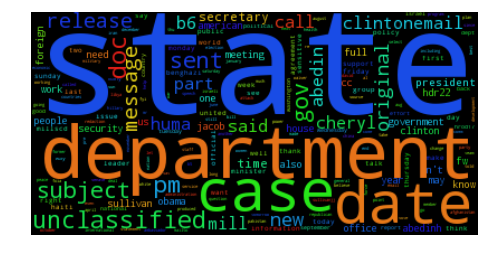

In [118]:
plt.imshow(wc2)
plt.axis("off")
plt.show()

The WordNet lemmatizer only removes affixes if the resulting word is in its dictionary. This additional checking process makes the lemmatizer slower than the above stemmers. Notice that it doesn't handle lying, but it converts women to woman.
  	

wnl = nltk.WordNetLemmatizer()

NOTE: for now, the second words cloud is not good enough as some of the words are not interesting at all, I'll try to look around lemmatizer as well and a better cleaning

In [134]:
# After looking at the mails, we can see a partern in the data we want to get rid of: it's always that format:
#
#UNCLASSIFIED
#U.S. Department of State
#Case No. F-2015-04841
#Doc No. C05739546
#Date: 05/13/2015
#STATE DEPT. - PRODUCED TO HOUSE SELECT BENGHAZI COMM.
#SUBJECT TO ...

mail = df_Emails.RawText[2]
x = ''
for l in mail.split('\n'):
    if not (l.startswith('UNCLASSIFIED') | l.startswith('U.S. Department of State') | l.startswith('Case No.') |
           l.startswith('Doc No.') | l.startswith('Date: ') |
            l.startswith('STATE DEPT. ') | l.startswith('SUBJECT TO ')):
        x+=l
print(x)

RELEASE INPART B6From: Mills, Cheryl D <MillsCD@state.gov>Sent: Wednesday, September 12, 2012 11:52 AMTo: B6Cc: Abedin, HumaSubject: Re: Chris StevensThxOriginal MessageFrom: Anne-Marie Slaughter [Sent: Wednesday, September 12, 2012 07:46 AMTo: Ihdr22@clintonernail.com' <hdr22@clintonemail corn>Cc: Abed in, Huma; Mills, Cheryl DSubject: Chris StevensTo you and all my former colleagues, I'm so terribly sorry. Our FSOs stand on the front lines just as surely and devotedlyas our soldiers do. Thinking of you and Pat and everyone this morning.AM


As it seems to do the trick, let's apply this to all the mails and see how it goes from here.

In [157]:
def cleanMail(mail):
    res = ''
    for l in mail.split('\n'):
        if not (l.startswith('UNCLASSIFIED') | l.startswith('U.S. Department of State') | l.startswith('Case No.') |
               l.startswith('Doc No.') | l.startswith('Date: ') |
                l.startswith('STATE DEPT. ') | l.startswith('SUBJECT TO ') | l.startswith('RELEASE ') | l.startswith('PART') |
               l.startswith('From:') | l.startswith('To:') | l.startswith('Sent:')):
            res+=l
    return res

In [163]:
df_Emails.RawText = df_Emails.RawText.apply(cleanMail)

In [165]:
df_Emails.RawText[0]

'Subject: FW: WowSubject: WowWhat a wonderful, strong and moving statement by your boss. please tell her how much Sen. McCain appreciated it. Metoo\x0c'

In [166]:
# We group up all the mails in a single string
text = ""
for mail in df_Emails.RawText:
    text += " " + mail
    
# Replace \n by a simple space
text = text.replace('\n', ' ')

In [169]:
w = [i for i in word_tokenize(text.lower()) if i not in stop]

In [173]:
#for i in range(len(w)):
#    w[i] = stemmer.stemmer.stem(w[i])

In [176]:
wc2 = WordCloud().generate(' '.join(w))

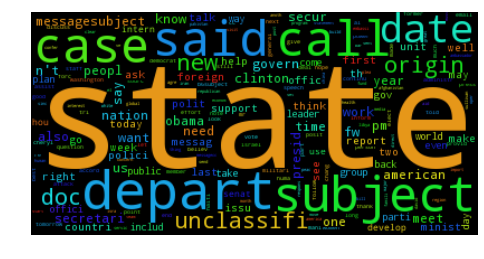

In [177]:
plt.imshow(wc2)
plt.axis("off")
plt.show()

In [194]:
# use of Lemmatizer instead of Stemmer (unactivated for now)
wnl = nltk.stem.WordNetLemmatizer()

In [202]:
wnl.lemmatize('secur')

'secur'

Some more cleaning needed, lemmatizer does not work well yet.

Maybe simpler to simply apply that on Subject column and the ExtractedBodyText column instead that the raw data.